In [265]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
import json
import pickle

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [266]:
#df = pd.read_csv("reviewsWithHeader.csv")

In [267]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    if( i >= 60000):
      break
  return pd.DataFrame.from_dict(df, orient='index')

df1 = getDF('reviews_Clothing_Shoes_and_Jewelry.json.gz')

In [268]:
#df1.drop(df1.index[30000:])

In [269]:
#df1.shape

In [270]:
#dataframe = pd.read_json('D:\Chrome Downloads\tsec_suraj\cells.json', lines = True,  orient='index')

In [271]:
#dataframe.to_csv('reviews.csv', sep=',', index=False)

In [272]:
print(df1.columns)
print(df1.shape)

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
(60000, 9)


In [273]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2XVJBSRI3SWDI,0000031887,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
1,A2G0LNLN79Q6HR,0000031887,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012"
2,A2R3K1KX09QBYP,0000031887,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013"
3,A19PBP93OF896,0000031887,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013"
4,A1P0IHU93EF9ZK,0000031887,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014"


In [274]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df1 = {}
  for d in parse(path):
    df1[i] = d
    i += 1
    if( i >= 60000):
      break
  return pd.DataFrame.from_dict(df1, orient='index')

df2 = getDF('reviews_Video_Games.json.gz')

In [275]:
#df1 = dataframe1.to_csv('reviews.csv', sep=',', index=False)

In [276]:
print(df2.columns)
print(df2.shape)

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
(60000, 9)


In [277]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5.0,Good game and Beta access!!,1373155200,"07 7, 2013"
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5.0,Love the game,1377302400,"08 24, 2013"
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4.0,MOH nice,1372896000,"07 4, 2013"
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5.0,Five Stars,1404950400,"07 10, 2014"
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5.0,memory lane,1386115200,"12 4, 2013"


In [278]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df1 = {}
  for d in parse(path):
    df1[i] = d
    i += 1
    if( i >= 60000):
      break
  return pd.DataFrame.from_dict(df1, orient='index')

df3 = getDF('reviews_Sports_And_Outdoors.json.gz')

In [279]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    if( i >= 60000):
      break
  return pd.DataFrame.from_dict(df, orient='index')

df5= getDF('reviews_Electronics.json.gz')

In [280]:
df5

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A2CX7LUOHB2NDG,0321732944,Bernie,"[0, 0]",While many beginner DVDs try to teach you ever...,5.0,Adobe Photoshop CS5 Crash Course with master P...,1341100800,"07 1, 2012"
2,A2NWSAGRHCP8N5,0439886341,bowmans2007,"[1, 1]",It never worked. My daughter worked to earn th...,1.0,absolutely horrible,1367193600,"04 29, 2013"
3,A2WNBOD3WNDNKT,0439886341,JAL,"[1, 1]",Some of the functions did not work properly. ...,3.0,Disappointing,1374451200,"07 22, 2013"
4,A1GI0U4ZRJA8WN,0439886341,Truthfull,"[4, 4]",Do not waste your money on this thing it is te...,1.0,TERRIBLE DONT WASTE YOUR MONEY,1334707200,"04 18, 2012"
...,...,...,...,...,...,...,...,...,...
59995,A3DX6U1B9KDUW4,B00004WHSD,"J. Boone ""Boone Emmons""","[1, 1]",This case is not universal! The case descript...,1.0,Targus Cho70 PDA/Handheld Leather Universal Case,1121385600,"07 15, 2005"
59996,A1BCHEPYUNRLJ,B00004WHSD,Julie,"[2, 2]",I looked at several different cases for the Pa...,5.0,Great Case,1009152000,"12 24, 2001"
59997,A1RLVKQQWHOQAW,B00004WHSD,Stanford P Hudson,"[12, 12]",Bought it for the Palm VIIx and it fits great ...,5.0,Works great with the Palm VIIx,984355200,"03 12, 2001"
59998,A3T9DOOJ5B1U7O,B00004WHV7,"Amazon Customer ""Gagdet-head""","[0, 0]","Look, if you don't know anything about electro...",5.0,Great camera if you take the time to learn to ...,1014249600,"02 21, 2002"


In [281]:
frames = [df1, df2, df3, df5]
df = pd.concat(frames)
df.shape

(240000, 9)

In [440]:
df.to_csv('all.csv')

### Product based CF

In [282]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged.head()

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y
0,A2XVJBSRI3SWDI,0000031887,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013",236,236,236,236,236,236,236,236
1,A2G0LNLN79Q6HR,0000031887,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012",236,236,236,236,236,236,236,236
2,A2R3K1KX09QBYP,0000031887,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013",236,236,236,236,236,236,236,236
3,A19PBP93OF896,0000031887,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013",236,236,236,236,236,236,236,236
4,A1P0IHU93EF9ZK,0000031887,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014",236,236,236,236,236,236,236,236


In [283]:
df.shape

(240000, 9)

In [312]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

Selecting products which have more than 50 reviews

In [313]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 1]
dfCount

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview
134604,A3HMVBQUINQD7K,B0000533G7,Zoeann Olin,"[0, 0]","This product is all natural, it is everything ...",5.0,An excellent product,1355270400,"12 12, 2012",2239,2239,2239,2239,2239,2239,2239,2239,2239,5.0,An excellent product
132416,AEHUADNI3T7WU,B0000533G7,Aiq,"[0, 0]",And tactile feeling after using this soap. I u...,5.0,pleasant smell,1364342400,"03 27, 2013",2239,2239,2239,2239,2239,2239,2239,2239,2239,5.0,pleasant smell
132407,A2TG9VCQ5MMQ26,B0000533G7,Adrienne M Walker,"[1, 1]",Dr. Bonner's soap is amazing. I use this produ...,5.0,great scent,1366761600,"04 24, 2013",2239,2239,2239,2239,2239,2239,2239,2239,2239,5.0,great scent
132421,A3DRJQI2CP71SP,B0000533G7,"AjoyFullNoize ""yeyo""","[1, 1]",As a novice vegetable gardener I purchased thi...,5.0,ABSOLUTELY WONDERFUL,1337299200,"05 18, 2012",2239,2239,2239,2239,2239,2239,2239,2239,2239,5.0,ABSOLUTELY WONDERFUL
132420,A1XACKDR9TBW4F,B0000533G7,A. Johnson,"[0, 0]",I have sensitive skin and these products work ...,5.0,Love,1356220800,"12 23, 2012",2239,2239,2239,2239,2239,2239,2239,2239,2239,5.0,Love
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186347,A2PCEMXCWVV272,9983901927,dlwalton,"[0, 0]",This product worked as advertised. It worked ...,5.0,Micro SD 2GB,1352764800,"11 13, 2012",1,1,1,1,1,1,1,1,1,5.0,Micro SD 2GB
1161,AO0XZVZNMNLJT,9830034321,Mark Mcintire,"[0, 0]",Got immediate head-turns and compliments on th...,5.0,Great fit...color...style,1403136000,"06 19, 2014",1,1,1,1,1,1,1,1,1,5.0,Great fit...color...style
28848,A4BEWR32DSUJA,B0000BUWQ0,"B D Howard ""Don't be average...""","[0, 0]","A dingy muddled piece with low brilliance, and...",2.0,Star falls short,1130457600,"10 28, 2005",1,1,1,1,1,1,1,1,1,2.0,Star falls short
28886,A3L5ZC4QCW6L73,B0000BUX71,Cat Woman,"[2, 2]",This charm is really cute and is actually 3D! ...,5.0,Adorable angel charm!,1091750400,"08 6, 2004",1,1,1,1,1,1,1,1,1,5.0,Adorable angel charm!


### Grouping all the summary Reviews by product ID

In [314]:
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [315]:
dfProductReview

,asin,overall,unixReviewTime
0,0000031852,3.857143,1.393978e+09
1,0000031887,4.224576,1.368126e+09
2,0000031895,3.666667,1.390781e+09
3,0000031909,2.666667,1.388794e+09
4,0000032034,3.666667,1.386259e+09
...,...,...,...
16606,B0001YR8T6,3.000000,1.165925e+09
16607,B0001YRAT4,4.162791,1.349520e+09
16608,B0001YRC7E,4.111111,1.374432e+09
16609,B0001YRJEA,4.750000,1.390651e+09


### create dataframe with certain columns

In [316]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [317]:
df3 = df3[['asin','summaryReview','overall']]

In [318]:
df3

,asin,summaryReview,overall
0,0000031852,['Happy with purchase even though it came a lo...,3.857143
1,0000031887,"['Cheap Waste of Money!', 'Xmas gift', 'My dau...",4.224576
2,0000031895,"['Completely See-Through', 'loved it!', 'Neon ...",3.666667
3,0000031909,"['cheaply made', 'Two Stars', 'Nice, but one p...",2.666667
4,0000032034,"['Tutus', 'NOT FOR ME', 'Wonderful']",3.666667
...,...,...,...
16606,B0001YR8T6,['Dickies SP14 Long Sleeve Industrial Work Shi...,3.000000
16607,B0001YRAT4,"['Good pants', 'Good pants for good price.', '...",4.162791
16608,B0001YRC7E,"['Good strong sturdy dress pants.', 'Great Pan...",4.111111
16609,B0001YRJEA,"['Exactly as expected', 'Great Pants', 'dickie...",4.750000


### Text Cleaning - Summary column

In [319]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [320]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
#df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [321]:
df3

,index,asin,summaryReview,overall,summaryClean
0,0,0000031852,['Happy with purchase even though it came a lo...,3.857143,happy with purchase even though it came a lot ...
1,1,0000031887,"['Cheap Waste of Money!', 'Xmas gift', 'My dau...",4.224576,cheap waste of money xmas gift my daughter lov...
2,2,0000031895,"['Completely See-Through', 'loved it!', 'Neon ...",3.666667,completely see through loved it neon blue tutu
3,3,0000031909,"['cheaply made', 'Two Stars', 'Nice, but one p...",2.666667,cheaply made two stars nice but one problem
4,4,0000032034,"['Tutus', 'NOT FOR ME', 'Wonderful']",3.666667,tutus not for me wonderful
...,...,...,...,...,...
16606,16606,B0001YR8T6,['Dickies SP14 Long Sleeve Industrial Work Shi...,3.000000,dickies sp long sleeve industrial work shirt g...
16607,16607,B0001YRAT4,"['Good pants', 'Good pants for good price.', '...",4.162791,good pants good pants for good price great cas...
16608,16608,B0001YRC7E,"['Good strong sturdy dress pants.', 'Great Pan...",4.111111,good strong sturdy dress pants great pants cus...
16609,16609,B0001YRJEA,"['Exactly as expected', 'Great Pants', 'dickie...",4.750000,exactly as expected great pants dickies painte...


In [322]:
df4 = df3[['asin']]
df4

,asin
0,0000031852
1,0000031887
2,0000031895
3,0000031909
4,0000032034
...,...
16606,B0001YR8T6
16607,B0001YRAT4
16608,B0001YRC7E
16609,B0001YRJEA


In [323]:
df4.loc[0]

asin    0000031852
Name: 0, dtype: object

In [324]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [325]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [326]:
dfReviews

,absolutely,action,addictive,adventure,advertised,amazing,amazon,amp,army,away,...,worked,working,works,world,worst,worth,wow,wrong,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,2,2,0,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
df4 = horizontal_stack = pd.concat([df4, dfReviews], axis=1)

In [328]:
df4.to_csv("df4.csv")

In [306]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)


In [441]:
def recommend_movies(movie_query, k_recommendations):
    raw_movies_data = []
    with open('df4.csv', 'r') as md:
        # Discard the first line (headings)
        next(md)

        # Read the data into memory
        for line in md.readlines():
            data_row = line.strip().split(',')
            raw_movies_data.append(data_row)

    # Prepare the data for use in the knn algorithm by picking
    # the relevant columns and converting the numeric columns
    # to numbers since they were read in as strings
    movies_recommendation_data = []
    for row in raw_movies_data:
        data_row = list(map(float, row[2:]))
        movies_recommendation_data.append(data_row)

    # Use the KNN algorithm to get the 5 movies that are most
    # similar to The Post.
    recommendation_indices, _ = knn(
        movies_recommendation_data, movie_query, k=k_recommendations,
        distance_fn=euclidean_distance, choice_fn=lambda x: None
    )

    movie_recommendations = []
    for _, index in recommendation_indices:
        movie_recommendations.append(raw_movies_data[index])

    return movie_recommendations

if __name__ == '__main__':
    x = df4[df4.asin == "0321732944"]
    x = x.index.values.tolist()

    x = dfReviews.loc[x[0]].tolist()

    the_post = x # feature vector for The Post
    recommended_movies = recommend_movies(movie_query=the_post, k_recommendations=5)

    # Print recommended movie titles
    for recommendation in recommended_movies:
        print(recommendation[1])

0000037214
0132793040
0321732944
0439339960
0439671418


In [419]:
x = df4.loc[1]
x.shape# feature vector for The Post


(301,)

In [436]:
x = df4[df4.asin == "0000031887"]
x = x.index.values.tolist()
x 
x = dfReviews.loc[x[0]].tolist()
x

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 35,
 4,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 5,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 10,
 0,
 0,
 0,
 2,
 0,
 0,
 12,
 1,
 0,
 34,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 9,
 0,
 0,
 1,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 16,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 12,
 0,
 0,
 5,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0

In [407]:

x = df4[df4.asin == "0000031887"]
x = x.index
x
x = df4.loc[x]
x=x.values.tolist()



In [408]:
y=[]
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            y.append(i)

reemovNestings(x)
y[1:]


[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 35,
 4,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 5,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 10,
 0,
 0,
 0,
 2,
 0,
 0,
 12,
 1,
 0,
 34,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 9,
 0,
 0,
 1,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 16,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 12,
 0,
 0,
 5,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0

In [371]:
dfReviews.iloc[1:].shape

(16610, 300)

In [31]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [32]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

356
40


In [33]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [34]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B0000TSQ8Y  average rating is  3.98019801980198
The first similar product is  B00000J4FS  average rating is  4.040983606557377
The second similar product is  B00004TL5Q  average rating is  3.97196261682243
-----------------------------------------------------------
Based on product reviews, for  B0000TW41Y  average rating is  4.573770491803279
The first similar product is  B0000ANDU4  average rating is  4.340909090909091
The second similar product is  B0000ASFQL  average rating is  4.685121107266436
-----------------------------------------------------------
Based on product reviews, for  B0000UIUNE  average rating is  4.493243243243243
The first similar product is  B0000TIIRS  average rating is  4.125
The second similar product is  B0000TIJ7C  average rating is  4.324074074074074
-----------------------------------------------------------
Based on product reviews, for  B0000UIY3U  average rating is  4.236559139784946
The first similar product is  B0000TI

In [35]:
print ("Based on product reviews, for ", df3["asin"][160] ," average rating is ",df3["overall"][160])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  B00004TWVY  average rating is  3.9158878504672896
The first similar product is  B0000BNEQJ  average rating is  4.3375
The second similar product is  B00004TVSP  average rating is  4.08029197080292
-----------------------------------------------------------


### Predicting Review Score

In [36]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.57      0.44      0.50         9
           4       0.85      0.93      0.89        30

    accuracy                           0.80        40
   macro avg       0.47      0.46      0.46        40
weighted avg       0.76      0.80      0.78        40



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Accuracy of the model

In [37]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.8


In [38]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.2


### Predicting Review Score with k = 5

In [41]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.57      0.44      0.50         9
           4       0.85      0.93      0.89        30

    accuracy                           0.80        40
   macro avg       0.47      0.46      0.46        40
weighted avg       0.76      0.80      0.78        40



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.8


In [43]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.2


### Predicting reviews with 85, 15 train, test split and k = 5

In [167]:
dfReviews

,absolutely,advertised,amazing,amazon,army,awesome,bad,bag,bali,ball,...,working,workout,works,world,worth,wow,wrong,year,years,zelda
0,0,1,1,1,0,1,2,0,0,0,...,0,0,0,0,2,2,0,4,0,0
1,0,5,8,3,0,28,5,0,0,0,...,2,0,80,0,6,2,5,0,0,0
2,0,0,3,0,0,0,4,0,0,0,...,0,0,2,0,3,1,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,3,0,3,0,0,1,1,0
4,0,0,1,0,0,3,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,0,0,0,0,0,2,0,0,0,...,0,0,2,0,0,0,0,0,0,0
392,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
393,1,0,0,1,0,2,1,0,0,0,...,0,0,0,0,0,0,3,1,1,0
394,0,1,0,1,0,2,4,0,0,0,...,0,0,0,0,0,0,6,0,1,0


In [214]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:]
dfReviews_test = X[:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)
print(lentrain)
print(lentest)

396
396


In [208]:
X

array([[0, 1, 1, ..., 4, 0, 0],
       [0, 5, 8, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [209]:
dfReviews_train

array([[0, 1, 1, ..., 4, 0, 0],
       [0, 5, 8, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [210]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [215]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][i] ," average rating is ",df3["overall"][i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  0000031887  average rating is  4.22457627118644
The first similar product is  0000031887  average rating is  4.22457627118644
The second similar product is  B00004U1J2  average rating is  3.8347826086956522
-----------------------------------------------------------
Based on product reviews, for  0972683275  average rating is  4.470980019029496
The first similar product is  0972683275  average rating is  4.470980019029496
The second similar product is  B0000AY1W1  average rating is  4.759427828348505
-----------------------------------------------------------
Based on product reviews, for  1400501466  average rating is  3.56
The first similar product is  1400501466  average rating is  3.56
The second similar product is  1400501776  average rating is  3.884892086330935
-----------------------------------------------------------
Based on product reviews, for  1400501776  average rating is  3.884892086330935
The first similar product is  1400501776  average 

In [218]:
#find most related products
#for i in range(lentest):
a = neighbor.kneighbors([dfReviews_test[df3.index[df3.asin == '0000031887']]])
related_product_list = a[1]

first_related_product = [item[0] for item in related_product_list]
first_related_product = str(first_related_product).strip('[]')
first_related_product = int(first_related_product)
second_related_product = [item[1] for item in related_product_list]
second_related_product = str(second_related_product).strip('[]')
second_related_product = int(second_related_product)
third_related_product = [item[2] for item in related_product_list]
third_related_product = str(third_related_product).strip('[]')
third_related_product = int(third_related_product)
print(df3.index[df3.asin == '0000031887'].tolist())   
print ("Based on product reviews, for ", df3["asin"][df3.index[df3.asin == '0000031887'] ," average rating is ",df3["overall"][lentrain + 0])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("The third similar product is ", df3["asin"][third_related_product] ," average rating is ",df3["overall"][third_related_product])

print ("-----------------------------------------------------------")

SyntaxError: invalid syntax (<ipython-input-218-a9525f5e1f60>, line 16)

In [47]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.57      0.33      0.42        12
           4       0.85      0.96      0.90        47

    accuracy                           0.82        60
   macro avg       0.47      0.43      0.44        60
weighted avg       0.78      0.82      0.79        60



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.8166666666666667


In [49]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.18333333333333332


### kNN with k = 3, Algorithm = Brute

In [94]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)


In [96]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.57      0.33      0.42        12
           4       0.85      0.96      0.90        47

    accuracy                           0.82        60
   macro avg       0.47      0.43      0.44        60
weighted avg       0.78      0.82      0.79        60

Accuracy:  0.8166666666666667
MSE:  0.18333333333333332


D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### kNN with k= 5, and Algorithm = KD_Tree

In [91]:
neighbor = NearestNeighbors(n_neighbors= 5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [92]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.57      0.33      0.42        12
           4       0.85      0.96      0.90        47

    accuracy                           0.82        60
   macro avg       0.47      0.43      0.44        60
weighted avg       0.78      0.82      0.79        60

Accuracy:  0.8166666666666667
MSE:  0.18333333333333332


D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
# Saving the model
filename = 'final_model.sav'
pickle.dump(neighbor, open(filename, 'wb'))

### Word correltation based on cluster

In [296]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

### World Clouding for Each Score Group

In [299]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

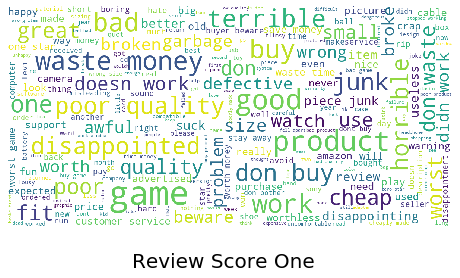

In [300]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

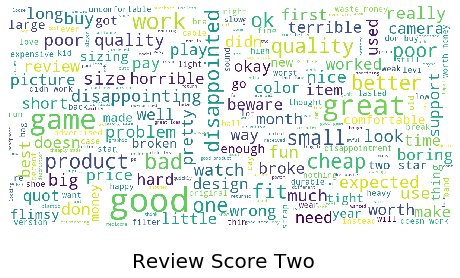

In [301]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

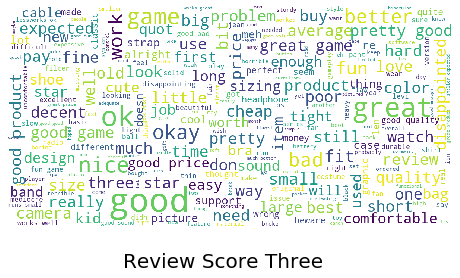

In [302]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

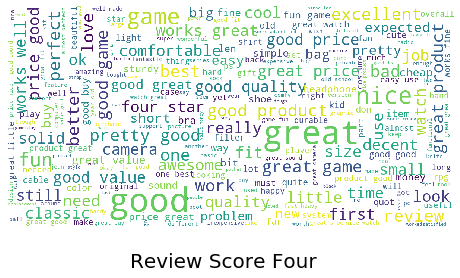

In [303]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

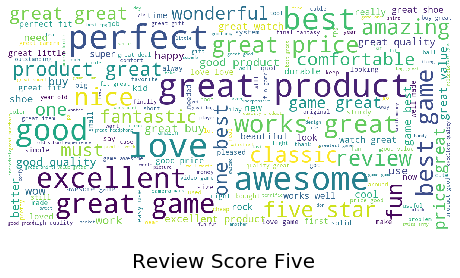

In [304]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")